In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm.auto import tqdm
from matplotlib.path import Path
import ast
import pickle
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import networkx as nx
from collections import Counter
import nxviz as nv

/home/jupyter-psillano/.local/lib/python3.7/site-packages/nxviz/__init__.py:29: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  """


# Analysis

In [2]:
MIN_TILES = 3

In [3]:
import random
G=nx.Graph()
fh=open('network_random_arts_25.csv','r')


for line in fh.readlines():
    s=line.strip().split(',')
    if int(s[2]) > MIN_TILES:
        if random.random() < 1:
            G.add_edge(str(s[0]), int(s[1]), weight = int(s[2]))
fh.close()  

In [4]:
len(G.nodes)

292270

## proiezioni arts
### proiezioni unweighted

In [6]:
arts = nx.bipartite.sets(G)[0]
#users = nx.bipartite.sets(G)[1]
len(arts)

25

In [84]:
A = bipartite.projected_graph(G,arts)

In [85]:
for n, d in A.nodes(data=True):
    A.nodes[n]["degree"] = A.degree()[n] / 25
    

In [21]:
A.nodes(data=True)

NodeDataView({'17': {'degree': 0.96}, '20': {'degree': 0.88}, '9': {'degree': 0.96}, '11': {'degree': 0.96}, '22': {'degree': 0.84}, '5': {'degree': 0.92}, '12': {'degree': 0.64}, '15': {'degree': 0.84}, '16': {'degree': 0.88}, '14': {'degree': 0.96}, '10': {'degree': 0.96}, '3': {'degree': 0.96}, '24': {'degree': 0.84}, '18': {'degree': 0.88}, '21': {'degree': 0.96}, '8': {'degree': 0.76}, '6': {'degree': 0.92}, '25': {'degree': 0.88}, '1': {'degree': 0.72}, '13': {'degree': 0.96}, '23': {'degree': 0.84}, '7': {'degree': 0.92}, '19': {'degree': 0.88}, '4': {'degree': 0.88}, '2': {'degree': 0.96}})

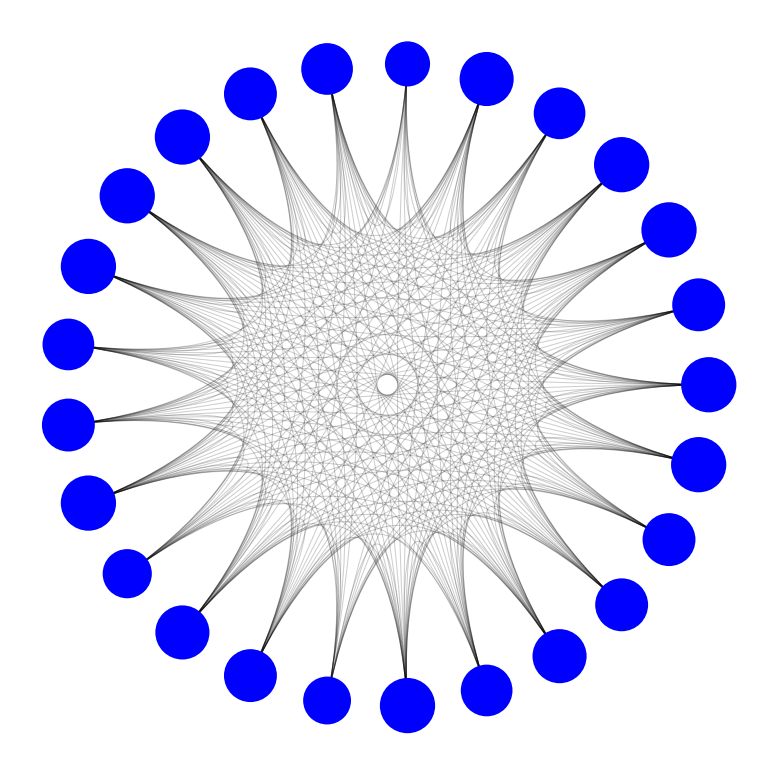

In [25]:
plt.figure(figsize=(20,14))
nv.circos(
    A,
    node_size_by= 'degree',
    #group_by="group",
    #node_color_by="group",
    #edge_alpha_by="weight",#transparency
    #edge_lw_by="weight",    # linewidth of the edges
    node_enc_kwargs={"size_scale": 0.7}
)

#plt.draw()
#plt.show()
plt.savefig('projections/arts_unweighted.png',dpi = 300)

In [49]:
from networkx.algorithms.community import greedy_modularity_communities
c = greedy_modularity_communities(A)

[frozenset({'1',
            '13',
            '16',
            '18',
            '19',
            '20',
            '24',
            '25',
            '3',
            '4',
            '6',
            '7',
            '8',
            '9'}),
 frozenset({'10', '11', '12', '14', '15', '17', '2', '21', '22', '23', '5'})]

<AxesSubplot:>

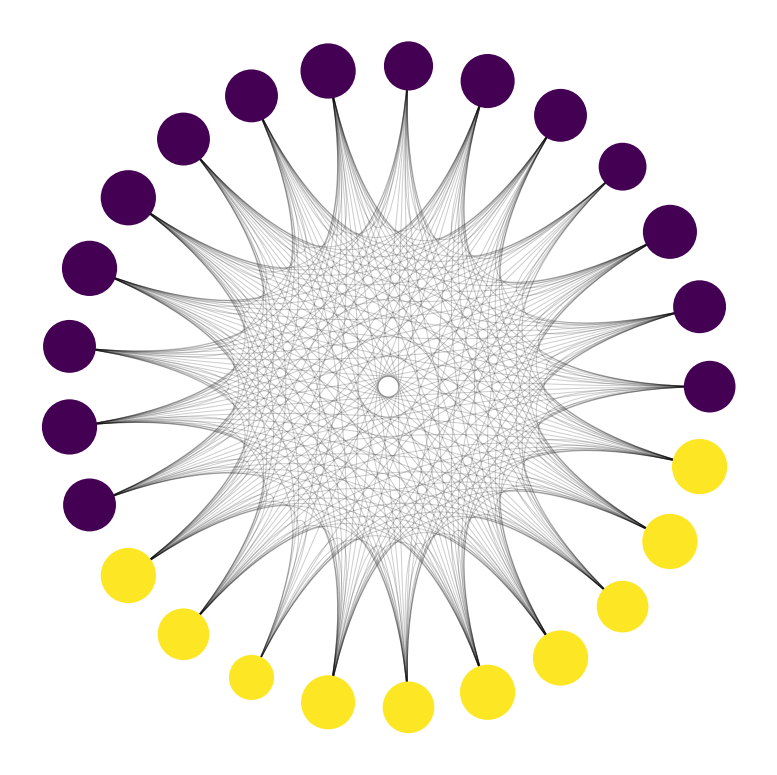

In [86]:
from networkx.algorithms.community import greedy_modularity_communities
c = greedy_modularity_communities(A)

counter = 0
for i in c:
    for n in i:
        A.nodes[n]["community"] = counter
    counter = counter + 1
    
    
plt.figure(figsize=(20,14))
nv.circos(
    A,
    node_size_by= 'degree',
    group_by="community",
    node_color_by="community",
    #edge_alpha_by="weight",#transparency
    #edge_lw_by="weight",    # linewidth of the edges
    node_enc_kwargs={"size_scale": 0.7}
)

### proiezioni weighted

In [16]:
A = bipartite.weighted_projected_graph(G,arts)

In [18]:
weight = []
for (u, v, d) in A.edges(data=True):
    weight.append(d["weight"])
l = sorted(weight,reverse=True)


In [19]:
remotion = []
for (u, v, d) in A.edges(data=True):
    if d["weight"] > 1000:
        remotion.append((u,v))
A.remove_edges_from(remotion)

In [21]:
for n, d in A.nodes(data=True):
    A.nodes[n]["degree"] = A.degree()[n] / 25
for (u, v, d) in A.edges(data=True):
    d["weight"] =  d["weight"] / 25

In [11]:
#A.nodes(data=True)

In [ ]:
#A.edges(data=True)

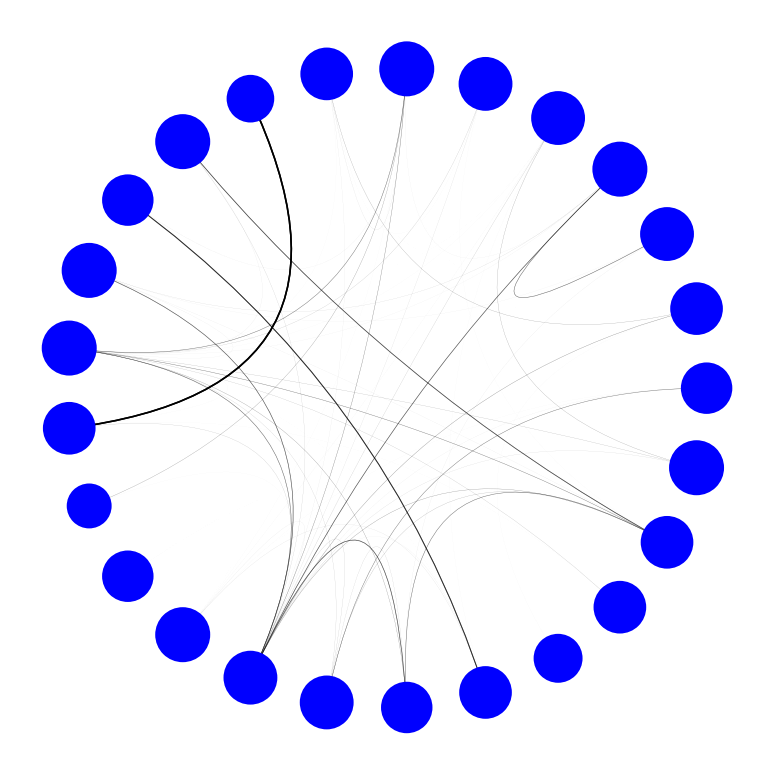

FileNotFoundError: [Errno 2] No such file or directory: 'projections/arts_weighted.png'

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(20,14))
nv.circos(
    A,
    #group_by="group",
    #node_color_by="group",
    node_size_by= 'degree',
    edge_alpha_by="weight",#transparency
    edge_lw_by="weight",    # linewidth of the edges
    node_enc_kwargs={"size_scale": 0.7}
)

plt.show()
plt.savefig('projections/arts_weighted.png',dpi = 300)

<AxesSubplot:>

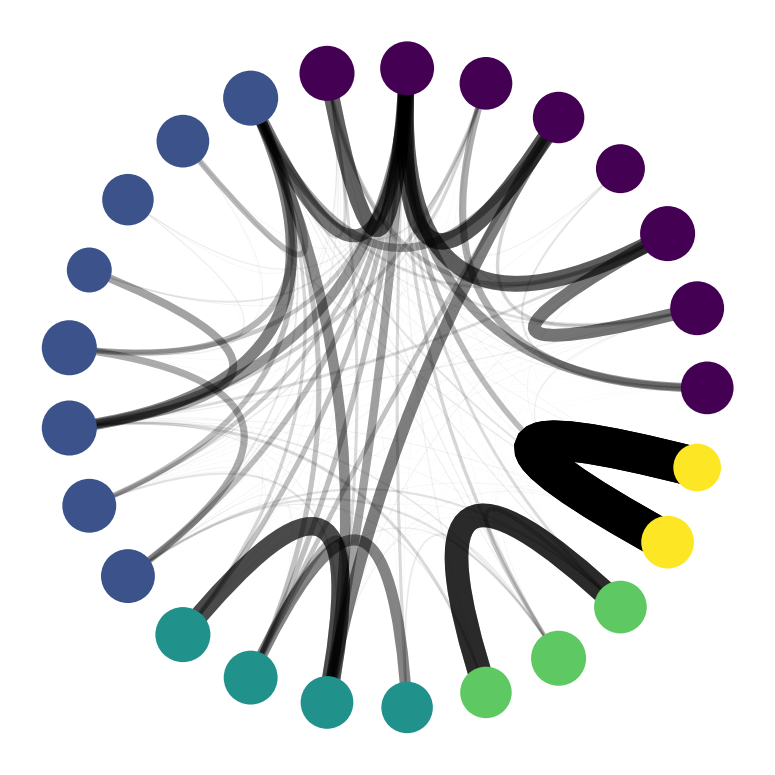

In [22]:
from networkx.algorithms.community import greedy_modularity_communities
c = greedy_modularity_communities(A,weight = 'weight')

counter = 0
for i in c:
    for n in i:
        A.nodes[n]["community"] = counter
    counter = counter + 1
    
    
plt.figure(figsize=(20,14))
nv.circos(
    A,
    node_size_by= 'degree',
    group_by="community",
    node_color_by="community",
    edge_alpha_by="weight",#transparency
    edge_lw_by="weight",    # linewidth of the edges
    node_enc_kwargs={"size_scale": 0.7}
)

In [24]:
# adding labels to nodes
name = []
arts = pd.read_csv('name_arts.csv')
for row in arts.itertuples():
    name.append(row.name)
    
for n, d in A.nodes(data=True):
    A.nodes[n]["label"] = name[int(n)]

In [25]:
len(arts)

100

In [26]:
c = greedy_modularity_communities(A,weight = 'weight')

counter = 0
for i in c:
    for n in i:
        A.nodes[n]["community"] = counter
    counter = counter + 1

In [31]:
A.nodes(data = True)
mapping = {}

for n, d in A.nodes(data=True):
    print(int(d['community']),d['label'])

2 Zuko and Toph
0 wubby7
0 Touhou Hijack
0 Sor Juana Inés de la Cruz
1 Girl Group Alley
1 Teddy Fresh x The H3 Podcast x Pokémon war efforts collaboration
1 MC/WC Alliance
0 Longnose Alley
4 Billy Herrington Tribute
2 The Blue Corner
3 Burdurland Logo
0 Brazilian/Irish flag
1 Z event flag
4 Flag of Iran
1 Flag of Poland
1 Baltic flags
3 OMORI Title Screen
0 Barış (peace) sign
2 Elspreen, Quackity, and the Republican Rat
0 Indian artwork
3 osu!
0 Flag of Bulgaria
1 Mr. Incredible
2 Flag of Italy
1 Kirby


In [ ]:
2 Zuko and Toph
2 The Blue Corner
2 Elspreen, Quackity, and the Republican Rat
2 Flag of Italy



### proiezioni weighted 2nd method

In [62]:
A = bipartite.collaboration_weighted_projected_graph(G,arts)

In [44]:
weight = []
for (u, v, d) in A.edges(data=True):
    weight.append(d["weight"])
l = sorted(weight,reverse=True)
l[:10]

[5688.166666666666,
 984.3333333333333,
 563.1666666666666,
 455.75,
 397.49999999999994,
 363.16666666666663,
 344.5,
 307.99999999999994,
 274.50000000000006,
 271.6666666666667]

In [63]:
remotion = []
for (u, v, d) in A.edges(data=True):
    if d["weight"] > 2000:
        remotion.append((u,v))
A.remove_edges_from(remotion)

In [64]:
for n, d in A.nodes(data=True):
    A.nodes[n]["degree"] = A.degree()[n] / 25
for (u, v, d) in A.edges(data=True):
    d["weight"] =  d["weight"] / 25

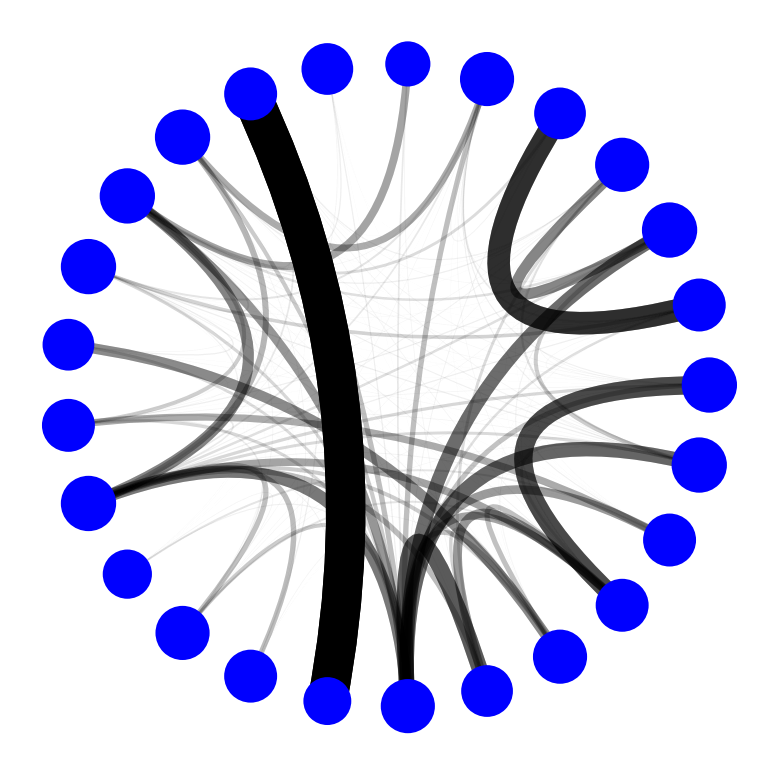

<Figure size 432x288 with 0 Axes>

In [47]:
plt.figure(figsize=(20,14))
nv.circos(
    A,
    #group_by="group",
    #node_color_by="group",
    node_size_by= 'degree',
    edge_alpha_by="weight",#transparency
    edge_lw_by="weight",    # linewidth of the edges
    node_enc_kwargs={"size_scale": 0.7}
)

plt.show()
plt.savefig('projections/arts_weighted_2nd.png',dpi = 300)

<AxesSubplot:>

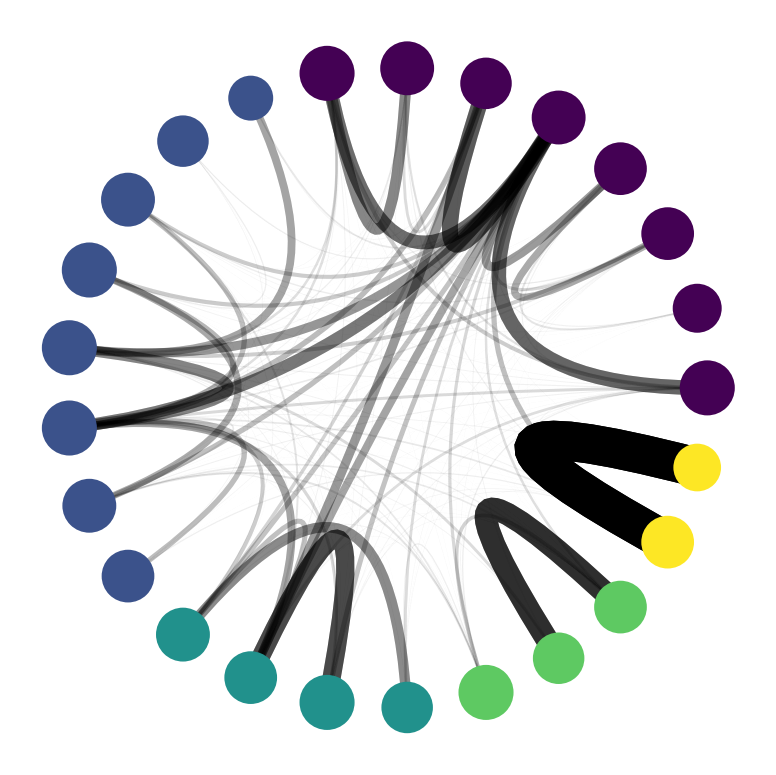

In [67]:
from networkx.algorithms.community import greedy_modularity_communities
c = greedy_modularity_communities(A,weight = 'weight')

counter = 0
for i in c:
    for n in i:
        A.nodes[n]["community"] = counter
    counter = counter + 1
    
    
plt.figure(figsize=(20,14))
nv.circos(
    A,
    node_size_by= 'degree',
    group_by="community",
    node_color_by="community",
    edge_alpha_by="weight",#transparency
    edge_lw_by="weight",    # linewidth of the edges
    node_enc_kwargs={"size_scale": 0.7}
)

In [ ]:
color_community = []

for i in range(0, len(G)):

    if i in communities[0]:
        color_community.append(0)
    else:
        color_community.append(1)

In [ ]:
counter = 0
for i in c:
    for n in i:
        A.nodes[n]["community"] = counter
    counter = counter + 1

In [72]:
color_community = []
counter = 0

for i in c:
    for n in i:
        color_community.append(counter)
    counter = counter + 1
color_community

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4]

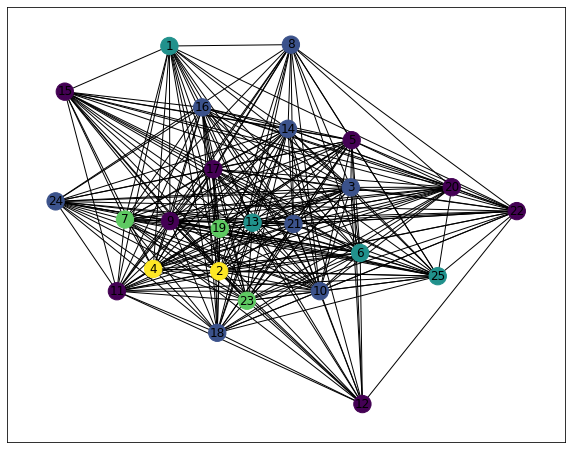

In [75]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(A)

nx.draw_networkx(
    A,
    pos,
    #labels=labels_GN,
    node_color=color_community,
    with_labels=True,
)

In [ ]:
# adding labels to nodes
name = []
arts = pd.read_csv('name_arts.csv')
for row in arts.itertuples():
    name.append(row.name)
    
for n, d in A.nodes(data=True):
    A.nodes[n]["label"] = name[int(n)]